In [5]:
import pandas as pd
import matplotlib.pyplot as plt
models_summary_df = pd.read_csv('/home/kssocha/Desktop/Nauka/portfolio/2024-gold-price-prediction-with-lstm-model/models/2024-04-27-2-monte-carlo/2024-04-27_lstm_iterations_summary.csv')

In [6]:
models_summary_df

,iteration,loss,val_loss,mean_squared_error,val_mean_squared_error,mean_absolute_error,val_mean_absolute_error,stopped_epoch
0,0,0.002653,0.001426,0.002653,0.001426,0.015524,0.036230,4175
1,1,0.002704,0.001780,0.002704,0.001780,0.018019,0.039808,1999
2,2,0.002738,0.001921,0.002738,0.001921,0.019486,0.041326,1999
3,3,0.002329,0.002254,0.002329,0.002254,0.018419,0.045051,1999
4,4,0.002752,0.001788,0.002752,0.001788,0.018544,0.040338,1999
...,...,...,...,...,...,...,...,...
95,95,0.002621,0.001521,0.002621,0.001521,0.017954,0.036658,1999
96,96,0.002373,0.002294,0.002373,0.002294,0.016143,0.046258,1999
97,97,0.002467,0.001677,0.002467,0.001677,0.018149,0.038666,1999
98,98,0.002281,0.001507,0.002281,0.001507,0.017503,0.036102,1999


$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

$n$ is the number of samples in the dataset

$y_i$ is the actual target value for the ith sample

$\hat{y}_i$ is the predicted value for the ith sample


$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

$n$ is the number of samples in the dataset

$y_i$ is the actual target value for the ith sample

$\hat{y}_i$ is the predicted value for the ith sample

In [7]:
import scipy.stats as stats
import numpy as np

In [40]:
def normality_test(test = 'normaltest', data = 'mean_squared_error', pv_threshold = 0.05):
    print('p_value threshold: {0}'.format(pv_threshold))
    print('(not applicable to Anderson test)')
    print('p_value for Anderson test: 0.05')
    print(100*'-')
    
    anderson_test = False
    
    if test == 'normaltest':
        #normal test based on D’Agostino and Pearson’s test
        #test that combines skew and kurtosis to produce an omnibus test of normality
        pv = stats.normaltest(models_summary_df[data])[1]
        description = '(normaltest is based on D’Agostino and Pearson’s test)'
    elif test == 'shapiro-wilk':
        # Shapiro-Wilk test
        # test for normality based on the correlation ratio
        pv = stats.shapiro(models_summary_df[data])[1]
        description = '(Shapiro-Wilk test is based on the correlation ratio)'
    elif test == 'anderson':
        
        anderson_test = True
        # Anderson-Darling test
        # test for normality based on the kurtosis and skewness of the data
        result = stats.anderson(models_summary_df[data], dist = 'norm')
        statistic = result.statistic
        pv_5 = result.critical_values[2]
        
        if pv_5 > statistic:
            success = True
        else:
            success = False
        
        description = '(Anderson-Darling test is based on the kurtosis and skewness of the data)'
        
    if anderson_test == False:    
        if pv < pv_threshold:
            print('p_value for {0}: {1}'.format(data, round(pv, 4)))
            print('{0} is not normally distributed based on {1}'.format(data, test))
            print('{0}'.format(description))
        elif pv > pv_threshold:
            print('p_value for {0}: {1}'.format(data, round(pv, 4)))
            print('{0} is normally distributed based on normaltest'.format(data))
            print('{0}'.format(description))
            print(100*'-')
            
            mean = round(models_summary_df[data].mean(), 4)
            std = round(models_summary_df[data].std(), 4)
            
            print('mean: {0}'.format(mean))
            print('standard deviation: {0}'.format(std))
            
    elif anderson_test == True:
        if success == True:
            print('{0} is normally distributed based on {1}'.format(data, test))
            print('{0}'.format(description))
            print(100*'-')
            
            mean = round(models_summary_df[data].mean(), 4)
            std = round(models_summary_df[data].std(), 4)
            
            print('mean: {0}'.format(mean))
            print('standard deviation: {0}'.format(std))
        
        elif success == False:
            print('{0} is not normally distributed based on {1}'.format(data, test))
            print('{0}'.format(description))
    print(100*'-')

In [81]:
def pdf_plot(results = 'mean_squared_error', training_bins = 20, val_bins = 20, training_distr = 'norm', val_distr = 'norm'):  

    fig = plt.figure(figsize = (10, 5))
    val_results = 'val_{}'.format(results)
    
    if training_distr == 'norm':
        fig = plt.hist(models_summary_df[results], bins = training_bins, density = True, alpha = 0.6, color = 'g', edgecolor = 'black',
                       label = 'trainig')
        
        training_params = stats.norm.fit(models_summary_df[results])
        training_xmin, training_xmax = plt.xlim()
        training_x = np.linspace(training_xmin, training_xmax, 100)
        training_p = stats.norm.pdf(training_x, training_params[0], training_params[1])
    
        fig = plt.plot(training_x, training_p, color = 'g', linewidth = 2, label = 'pdf - training')
        fig = plt.axvline(training_params[0], color = 'g', linestyle = 'dashed', linewidth = 1, label = 'mean - training')
    elif training_distr != 'norm':
        fig = plt.hist(models_summary_df[results], bins = training_bins, density = True, alpha = 0.6, color = 'g', edgecolor = 'black',
                       label = 'trainig')
    
    if val_distr == 'norm':
        fig = plt.hist(models_summary_df[val_results], bins = val_bins, density = True, alpha = 0.6, color = 'b', edgecolor = 'black',
                       label = 'val')
 
        val_params = stats.norm.fit(models_summary_df[val_results])
        val_xmin, val_xmax = plt.xlim()
        val_x = np.linspace(val_xmin, val_xmax, 100)
        val_p = stats.norm.pdf(val_x, val_params[0], val_params[1])  
    
        fig = plt.plot(val_x, val_p, color = 'b', linewidth = 2, label = 'pdf - val')
        fig = plt.axvline(val_params[0], color = 'b', linestyle = 'dashed', linewidth = 1, label = 'mean - val')
    elif val_distr != 'norm':
        fig = plt.hist(models_summary_df[val_results], bins = val_bins, density = True, alpha = 0.6, color = 'b', edgecolor = 'black',
                       label = 'val')
    
    fig = plt.title('training vs validation resalts of {}'.format(results))
    fig = plt.legend()
    
    return fig

p_value threshold: 0.05
(not applicable to Anderson test)
p_value for Anderson test: 0.05
----------------------------------------------------------------------------------------------------
p_value for mean_squared_error: 0.1386
mean_squared_error is normally distributed based on normaltest
(Shapiro-Wilk test is based on the correlation ratio)
----------------------------------------------------------------------------------------------------
mean: 0.0027
standard deviation: 0.0002
----------------------------------------------------------------------------------------------------
p_value threshold: 0.05
(not applicable to Anderson test)
p_value for Anderson test: 0.05
----------------------------------------------------------------------------------------------------
p_value for val_mean_squared_error: 0.2839
val_mean_squared_error is normally distributed based on normaltest
(Shapiro-Wilk test is based on the correlation ratio)
--------------------------------------------------------

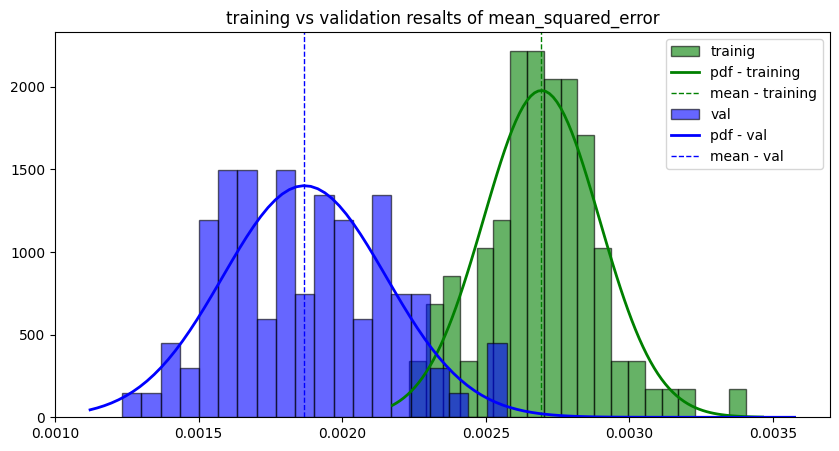

In [82]:
normality_test(test = 'shapiro-wilk', data = 'mean_squared_error', pv_threshold = 0.05)
normality_test(test = 'shapiro-wilk', data = 'val_mean_squared_error', pv_threshold = 0.05)
pdf_plot(results = 'mean_squared_error', training_bins = 20, val_bins = 20, training_distr = 'norm', val_distr = 'norm')

p_value threshold: 0.05
(not applicable to Anderson test)
p_value for Anderson test: 0.05
----------------------------------------------------------------------------------------------------
p_value for mean_absolute_error: 0.0008
mean_absolute_error is not normally distributed based on shapiro-wilk
(Shapiro-Wilk test is based on the correlation ratio)
----------------------------------------------------------------------------------------------------
p_value threshold: 0.05
(not applicable to Anderson test)
p_value for Anderson test: 0.05
----------------------------------------------------------------------------------------------------
p_value for val_mean_absolute_error: 0.5363
val_mean_absolute_error is normally distributed based on normaltest
(Shapiro-Wilk test is based on the correlation ratio)
----------------------------------------------------------------------------------------------------
mean: 0.0407
standard deviation: 0.0034
----------------------------------------------

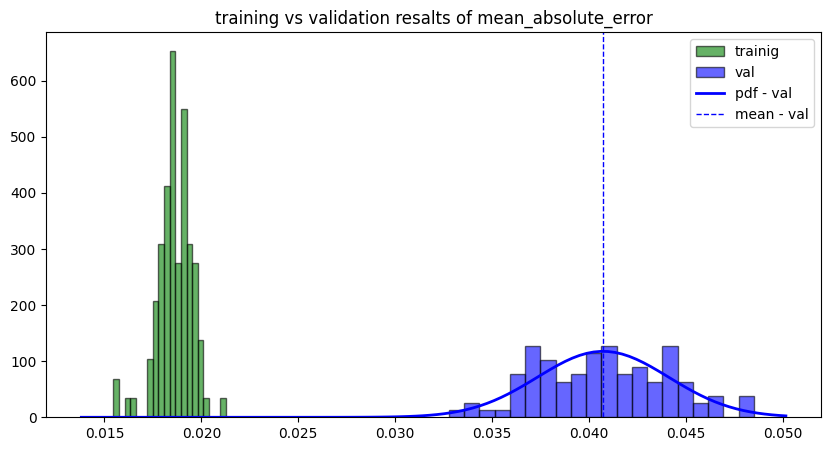

In [83]:
normality_test(test = 'shapiro-wilk', data = 'mean_absolute_error', pv_threshold = 0.05)
normality_test(test = 'shapiro-wilk', data = 'val_mean_absolute_error', pv_threshold = 0.05)
pdf_plot(results = 'mean_absolute_error', training_bins = 20, val_bins = 20, training_distr = 'not-norm', val_distr = 'norm')

In [84]:
models_summary_df[models_summary_df['val_mean_squared_error']==models_summary_df['val_mean_squared_error'].min()]

,iteration,loss,val_loss,mean_squared_error,val_mean_squared_error,mean_absolute_error,val_mean_absolute_error,stopped_epoch
28,28,0.002826,0.001234,0.002826,0.001234,0.019396,0.032776,1999


In [85]:
models_summary_df[models_summary_df['val_mean_absolute_error']==models_summary_df['val_mean_absolute_error'].min()]

,iteration,loss,val_loss,mean_squared_error,val_mean_squared_error,mean_absolute_error,val_mean_absolute_error,stopped_epoch
28,28,0.002826,0.001234,0.002826,0.001234,0.019396,0.032776,1999


In [86]:
import json
model_history_file_path = '/home/kssocha/Desktop/Nauka/portfolio/2024-gold-price-prediction-with-lstm-model/models/2024-04-27-2-monte-carlo/2024-04-27-history/2024-04-27_lstm_model_history_28.json'

# Read the JSON data from the file into a dictionary
with open(model_history_file_path, 'r') as json_file:
    data_dict = json.load(json_file)

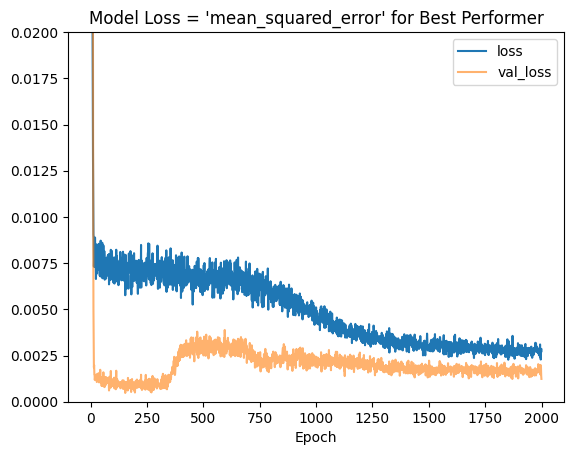

In [87]:
import matplotlib.pyplot as plt
plt.plot(data_dict['loss'], label='loss')
plt.plot(data_dict['val_loss'], label='val_loss', alpha = 0.6)
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0, 0.02)
plt.title("Model Loss = 'mean_squared_error' for Best Performer")
plt.show();

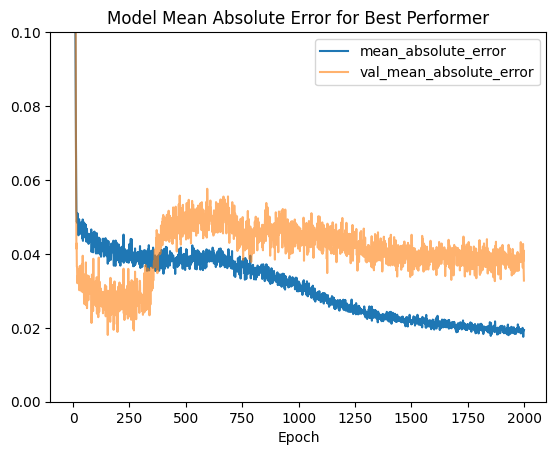

In [88]:
import matplotlib.pyplot as plt
plt.plot(data_dict['mean_absolute_error'], label='mean_absolute_error')
plt.plot(data_dict['val_mean_absolute_error'], label='val_mean_absolute_error', alpha =0.6)
plt.legend()
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.title("Model Mean Absolute Error for Best Performer")
plt.show();